In [1]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import speed_db as db
from importlib import reload

In [2]:
np.random.seed(5)

In [3]:
n1 = 200
n2 = 300

In [4]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1) #loc é a média, scale é o desvio padrão
rvs2 = stats.norm.rvs(size=n2, loc=0., scale=1)

In [5]:
stats.norm.pdf(-4)

0.00013383022576488537

In [6]:
np.exp(0**2/2)/np.sqrt(2*np.pi)

0.3989422804014327

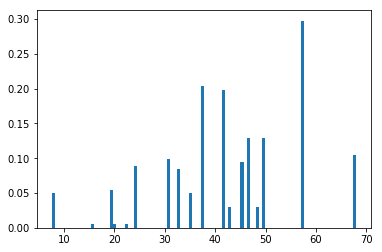

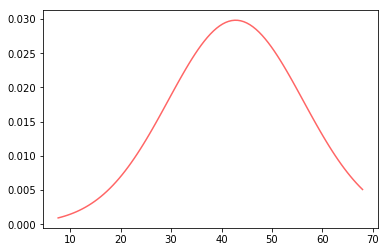

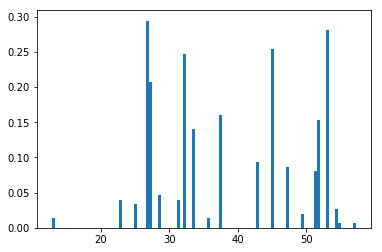

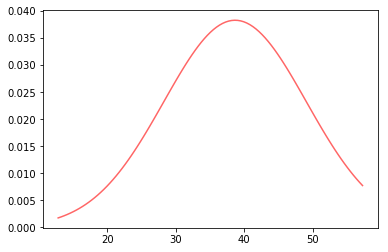

In [8]:
reload(db)
edge1 = db.access("taxi-fortaleza", "postgres", "32532")
db.plot_pdf(edge1)
edge2 = db.access("taxi-fortaleza", "postgres", "647")
db.plot_pdf(edge2)

In [9]:
edge1.head()

,edge,date,speed,from,to
0,32532,2016-06-01 12:19:46.000,19.394404,730,29520
1,32532,2016-06-01 12:24:27.697,19.394404,730,29520
2,32532,2016-06-01 12:24:27.705,19.394404,730,29520
3,32532,2016-06-01 12:24:27.714,19.394404,730,29520
4,32532,2016-06-01 12:24:27.731,19.394404,730,29520


In [10]:
mean = np.mean(edge1.speed)
mean

42.796766723830586

In [11]:
std = np.std(edge1.speed)
std

13.379853547147839

In [12]:
stats.norm.pdf(0, loc=mean, scale=std)
r = edge1.speed
r.unique()


array([ 19.39440443,  24.43186708,  46.63984175,  30.99126392,
         8.15541837,  67.95380457,  45.56514745,  35.14333764,
        48.19301917,  22.64704271,  32.58122267,  37.74365829,
        41.45853885,   7.60942408,  49.77960131,  15.63420753,
        57.09899462,  19.9345648 ,  43.12866722])

In [13]:
norm.pdf(r.unique(), loc=mean, scale=std)

array([ 0.00645875,  0.0116241 ,  0.02861172,  0.02020257,  0.00104439,
        0.00509091,  0.02918519,  0.0253168 ,  0.02748764,  0.00959351,
        0.02227799,  0.0277643 ,  0.02966788,  0.00093889,  0.02602041,
        0.0037977 ,  0.01683993,  0.00692566,  0.02980747])

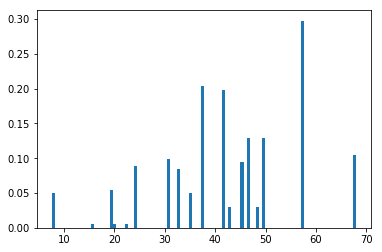

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
plt.subplot(111)
rv = stats.norm.rvs(loc=mean, scale=std, size = 1000) 
count, bins, ignored = plt.hist(r, normed=True, bins=100)
#count, bins, ignored = plt.hist(rv, normed=True)

plt.show()

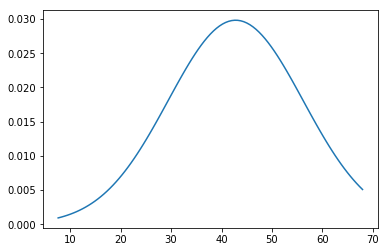

In [15]:
#plt.subplot(211)

plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2)))
plt.show()

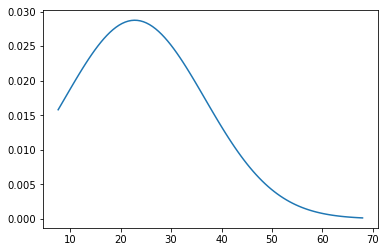

In [16]:
mean2 = mean -20
std2 = std +0.5
plt.plot(bins, 1/(std2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean2)**2 / (2 * std2**2)))
plt.show()

In [17]:
norm.pdf(14,loc=mean, scale=std)

0.002941678441761476

In [18]:
# Comparar duas normais
pdf1 = norm.rvs(loc=mean, scale=std, size=100)
pdf2 = norm.rvs(loc=mean2, scale=std2, size=100)
#stats.kstest(pdf1, norm.rvs, args=(mean2,std2))